# Zoom In Images Project


# Importing Libraries


In [19]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift
import os
import matplotlib.pyplot as plt
from PIL import Image
from cv2 import resize

# Main


## Image loading


In [20]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "barbara.jpg" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [21]:
image = Image.open(filepath).convert('L') #Load image as a grayscale
image = np.array(image) #Convert Image to array

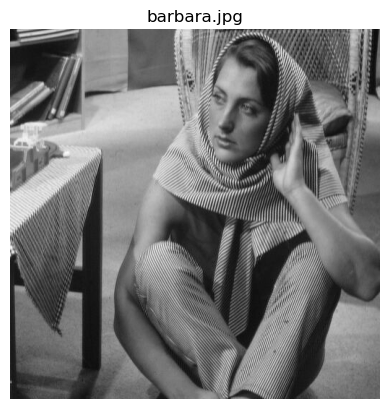

In [22]:
##Display loaded image

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(FILENAME)
plt.show()

## Image resizing (Half Size)


### Subsampling


In [23]:
subsampledImage = image[::2, ::2] #We keep one every second pixel 

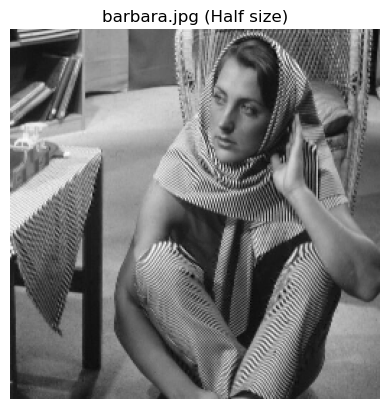

In [24]:
##Display subsampled image. WE can see artefact due to the subsambling (particulary on the pants of barbara.jpg)

plt.imshow(subsampledImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Half size)")
plt.show()

### Fourier domain resizing


In [25]:
fftImage = fftshift(fft2(image)) #Calculate fft of image, then shifting it

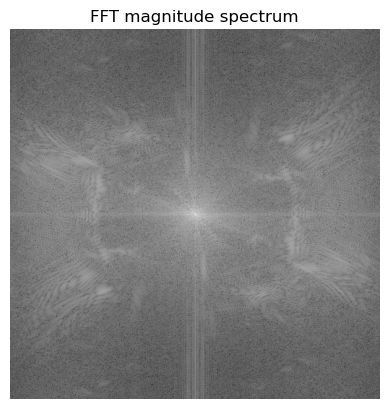

In [26]:
## Display the fft. Since values of the fft magnitude can be quite big, we display here the log magnitude in grayscale.

logMagnitudeSpectrum = np.log1p(abs(fftImage))

plt.imshow(logMagnitudeSpectrum, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

In [27]:
fftImageDownsized = fftImage[fftImage.shape[0] // 4 : 3 * fftImage.shape[0] // 4, fftImage.shape[1] // 4 : 3 * fftImage.shape[1] // 4] ## We subsample the fft, keeping only the central frequencies.

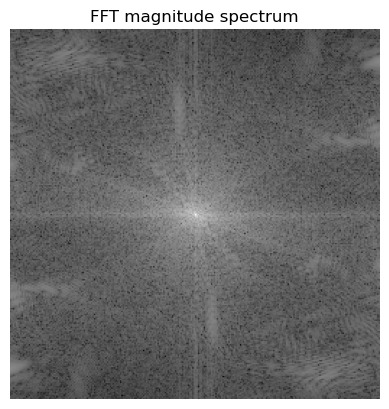

In [28]:
## Display the central frequencies

logMagnitudeSpectrumDownsized = np.log1p(abs(fftImageDownsized))

plt.imshow(logMagnitudeSpectrumDownsized, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

In [29]:
fftImageDownsized.shape #Size is half of the original image

(256, 256)

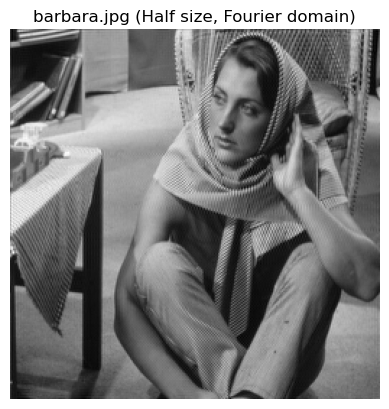

In [30]:
## Display the downsized image. Here, previous artifacts are erased

downsizedImage = abs(ifft2(fftImageDownsized)) #Using ifft2, we can reconstruct the image

plt.imshow(downsizedImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Half size, Fourier domain)")
plt.show()

## Image resizing (Double Size)


### FFT Domain


In [31]:
fftUpscaled = np.pad(fftImage, fftImage.shape[0] //2) #To get a bigger image, we pad the FFT with 0 values

In [32]:
fftUpscaled.shape #Size is double the original image

(1024, 1024)

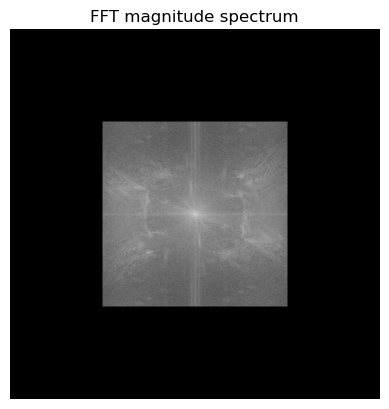

In [33]:
## Display the padded logmagnitude

logMagnitudeSpectrumUpscaled = np.log1p(abs(fftUpscaled))

plt.imshow(logMagnitudeSpectrumUpscaled, cmap='gray')
plt.title('FFT magnitude spectrum')
plt.axis('off')
plt.show()

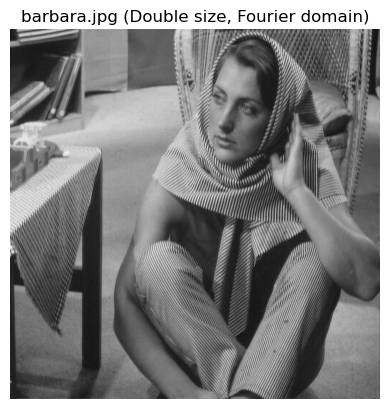

In [34]:
## Display the image of double size

upscaledImage = abs(ifft2(fftUpscaled))

plt.imshow(upscaledImage, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Double size, Fourier domain)")
plt.show()

### Linear Interpolation


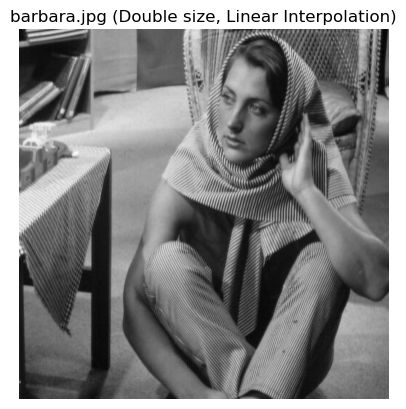

In [35]:
##We can also use the resize function from cv2 to linearly interpolate each pixel. WE obtain similar results as with the fft2

upscaledImageLinear = resize(image, None, fx=2, fy=2)

plt.imshow(upscaledImageLinear, cmap='gray')
plt.axis('off')
plt.title(f"{FILENAME} (Double size, Linear Interpolation)")
plt.show()